In [1]:
import sys
sys.path.append('..')

In [2]:
import glob
import loader
import seaborn as sns
import numpy as np
import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_01/rep00


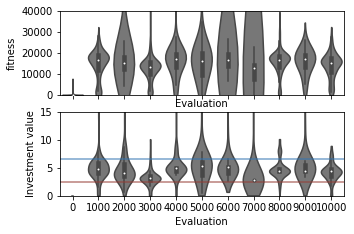

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_02/rep00


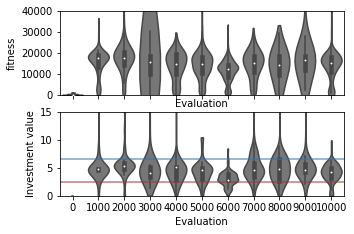

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_03/rep00


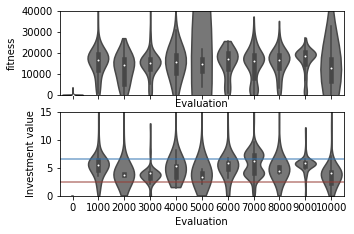

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_04/rep00


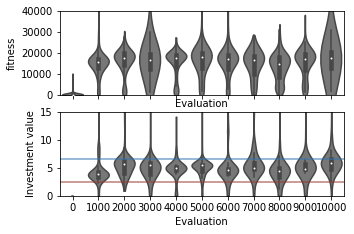

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_05/rep00


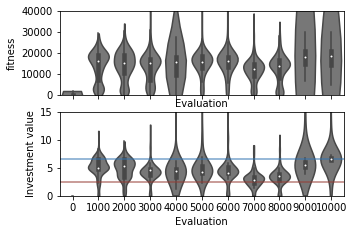

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_06/rep00


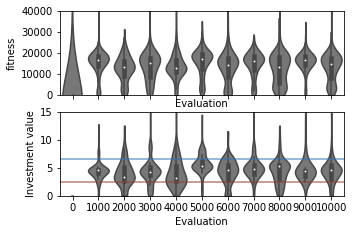

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_07/rep00


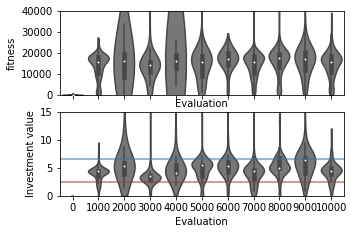

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_08/rep00


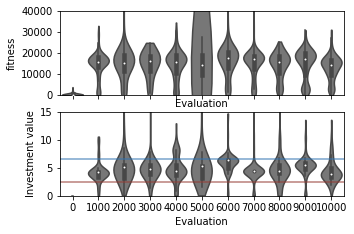

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_09/rep00


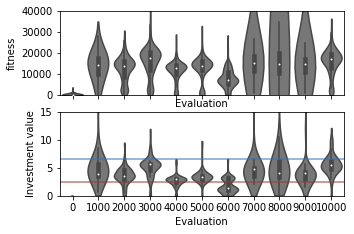

KeyboardInterrupt: 

In [4]:
#mainpaths = '../../../../logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0358/fake_see/**/rep00'
mainpaths = '../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/**/rep00'
paths = sorted(glob.glob(mainpaths))
run = 0
for name, fit in zip(paths, loader.getfitness(paths)):
    print('kikoo')
    gensamples = list(range(999, 9001, 1000)) + [9999]
    totgen = [{'inv': 0, 'generation': 0, 'run': run}]
    print(name)
    for curgen, gens in zip(gensamples, loader.getgenomes([name], gensamples, forgiving=False)):
        for gen in gens:
            totgen.append({'generation': curgen + 1, 'inv': gen, 'run': run})
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.1, 5.1/3 * 2), sharex=True)
    if 'bigsig' in name:
        fit['fitness'] *= 1000
    sns.violinplot(ax=ax1, data=fit.query('(gen +1)% 1000 == 0 or gen == 0'), x='gen', y='fitness', cut=0, scale='count', color="#777777")
    ax1.set_ylim(0, 40000)
    ax1.set_xlabel('Evaluation')
    dfgen = pd.DataFrame(totgen)
    #print(dfgen)
    dfgen['inv'] += np.random.normal(0, 0.0001, len(dfgen['inv']))
    sns.violinplot(data=dfgen, x='generation', y='inv', scale='count', cut=0, color="#777777", ax=ax2)
    ax2.set_ylim(0, 15)
    ax2.set_xlabel('Evaluation')
    ax2.set_ylabel('Investment value')
    ax2.axhline(2.5, label="$x_{selfish}$", c="#963d35", linewidth=2, alpha=0.5)
    ax2.axhline(6.5, label="$x_{cooperate}$", c="#3375b2", linewidth=2, alpha=0.5)

    plt.show()
    run += 1

kikoo
../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_06/rep00


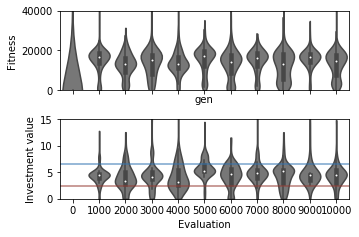

In [8]:
#mainpaths = '../../../../logs/bm-alife-tp-allconf-method2-noclamp-2019-03-13-0358/fake_see/run_16/rep00'
mainpaths = '../../../../logs/bm-alife-tp-allconf-method2-noclamp-bigsig-max50-2019-04-08-1503/nofake_see/run_06/rep00'
paths = sorted(glob.glob(mainpaths))
run = 0
for name, fit in zip(paths, loader.getfitness(paths)):
    print('kikoo')
    gensamples = list(range(999, 9001, 1000)) + [9999]
    totgen = [{'inv': 0, 'generation': 0, 'run': run}]
    print(name)
    for curgen, gens in zip(gensamples, loader.getgenomes([name], gensamples, forgiving=False)):
        for gen in gens:
            totgen.append({'generation': curgen + 1, 'inv': gen, 'run': run})
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5.1, 5.1/3 * 2), sharex=True)
    if 'bigsig' in name:
        fit['fitness'] *= 1000
    sns.violinplot(ax=ax1, data=fit.query('(gen +1)% 1000 == 0 or gen == 0'), x='gen', y='fitness', cut=0, scale='count', color="#777777")
    ax1.set_ylim(0, 40000)
    #ax1.set_xlabel('Evaluation')
    ax1.set_ylabel('Fitness')
    dfgen = pd.DataFrame(totgen)
    #print(dfgen)
    dfgen['inv'] += np.random.normal(0, 0.000001, len(dfgen['inv'])) # very very small noise to force violin drawing
    sns.violinplot(data=dfgen, x='generation', y='inv', scale='count', cut=0, color="#777777", ax=ax2)
    ax2.set_ylim(0, 15)
    ax2.set_xlabel('Evaluation')
    ax2.set_ylabel('Investment value')
    ax2.axhline(2.5, label="$x_{selfish}$", c="#963d35", linewidth=2, alpha=0.5)
    ax2.axhline(6.5, label="$x_{cooperate}$", c="#3375b2", linewidth=2, alpha=0.5)
    plt.tight_layout()
    fig.savefig('../Results/fitness_coop_nofake_highmut_slowconv.pdf')
    plt.show()
    run += 1